# loan-prediction

In [87]:
# import libraries 
import numpy as np 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os


In [88]:
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")


### Data preprocessing

In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [90]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [94]:
for column in df_train.columns:
    df_train[column].fillna(method='ffill', inplace=True)


In [95]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [96]:
df_train['LoanAmount'] = df_train['LoanAmount'].replace(np.nan,df_train['LoanAmount'].mean())

In [97]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [98]:
df_train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,147.381729,341.628664,0.835505
std,6109.041673,2926.248369,87.440893,65.656819,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,167.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [99]:
# Using map function
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1, 'No': 0})
df_train['Dependents'] = df_train['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df_train['Education'] = df_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1, 'No': 0})
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban': 2})

In [100]:
df_train['Loan_Amount_Term'].unique()


array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [101]:
bar = df_train.groupby(['Gender','Property_Area'])[['Loan_Status']].sum().reset_index()
bar

,Gender,Property_Area,Loan_Status
0,0,0,19
1,0,1,15
2,0,2,43
3,1,0,114
4,1,1,95
5,1,2,136


In [102]:
df_train = df_train.drop(['Loan_ID'], axis=1)


In [103]:
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']


In [104]:
df_train['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [105]:
df_train['Property_Area'].unique()

array([0, 1, 2], dtype=int64)

In [106]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,147.381729,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


### histograms for numeric columns 

In [107]:
numeric_column = df.select_dtypes(exclude='int').columns
numeric_column

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

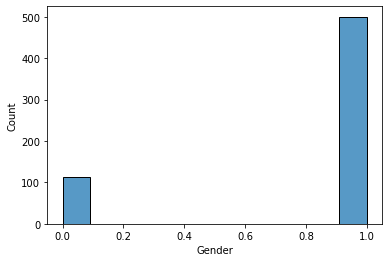

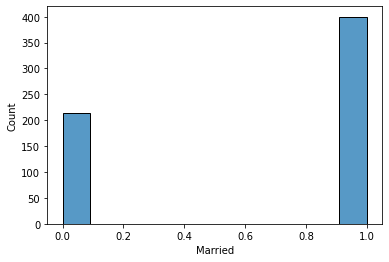

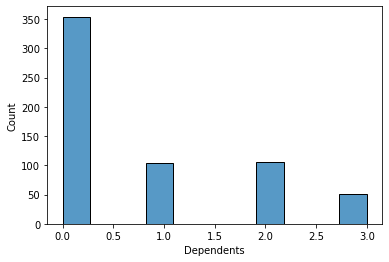

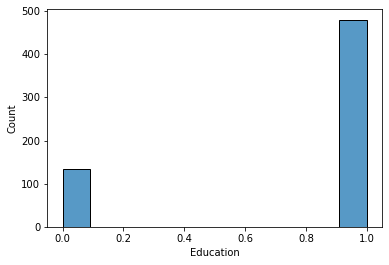

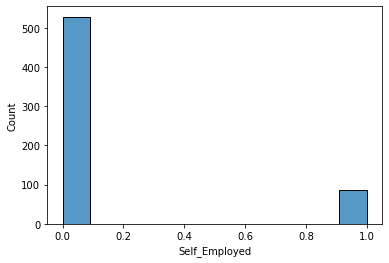

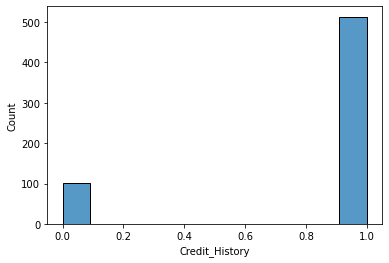

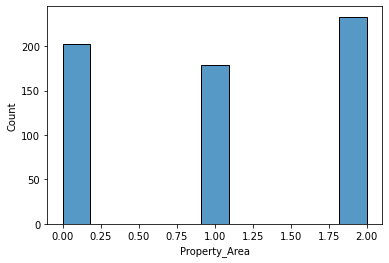

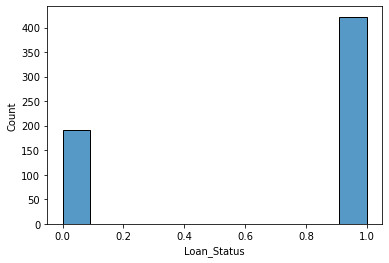

In [108]:
for col in numeric_column:
    sns.histplot(df_train[col])
    plt.show()
      

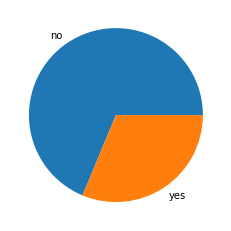

In [109]:
x = df['Loan_Status'].value_counts()
plt.pie(x,labels=['no','yes']);

### visualize the correlation matrix of the dataset.

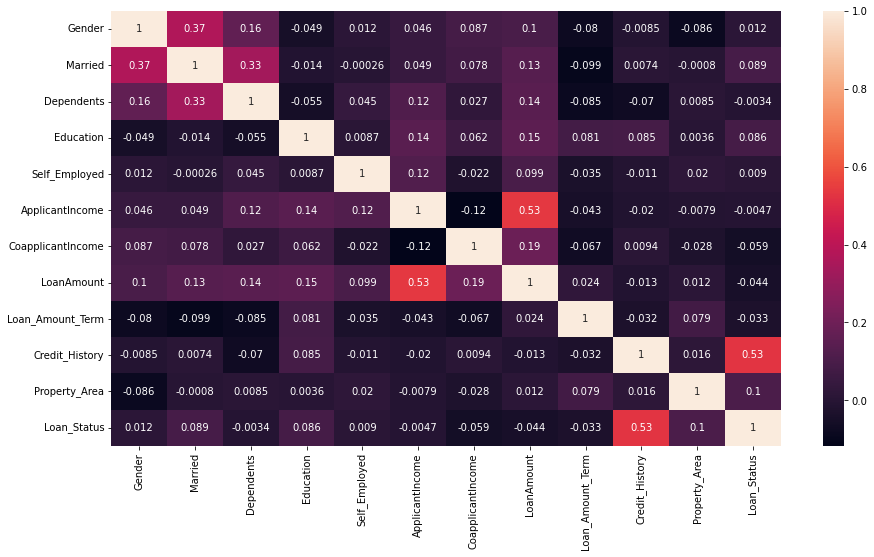

In [110]:
plt.figure(figsize=[15,8])
sns.heatmap(df_train.corr(),annot=True);

In [111]:
X.fillna( method ='ffill', inplace = True)


In [112]:
X = pd.get_dummies(X , drop_first = True)
X 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,147.381729,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0


In [113]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42, stratify=y)

### LogisticRegression

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.58      0.72        48
           1       0.84      0.98      0.90       106

    accuracy                           0.86       154
   macro avg       0.89      0.78      0.81       154
weighted avg       0.87      0.86      0.85       154



### SVC

In [117]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(x_train_scaled,y_train)

SVC()

In [118]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.8506493506493507

### RandomForestClassifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print('evaluation on training', rf.score(x_train_scaled,y_train))
print('evaluation on testing', rf.score(x_test_scaled,y_test))

evaluation on training 1.0
evaluation on testing 0.8311688311688312


### KNN  


In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
print('evaluation on training', knn.score(x_train_scaled,y_train))
print('evaluation on testing', knn.score(x_test_scaled,y_test))

evaluation on training 0.8021739130434783
evaluation on testing 0.8181818181818182


# Logistic Regression:

### - Logistic Regression is commonly used for binary classification problems.
### - The classification report provides detailed information about precision, recall, and F1-score for each class.


# SVM with RBF Kernel:

### -  SVMs are powerful for both binary and multiclass classification.
### -  Accuracy score is used as an evaluation metric.

# Random Forest:

### - Random Forest is an ensemble method known for its robustness and ability to handle complex relationships.
### - Accuracy score is used as an evaluation metric.

# K-Nearest Neighbors (KNN):

### - KNN is a simple and intuitive algorithm based on distance metrics.
### - Accuracy score is used as an evaluation metric.